In [7]:
# QUIZ
# 
# In the seir_model function below, 
# solve the SEIR model using the 
# Forward Euler Method.

from udacityplots import *
import numpy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

h = 0.5 # days
transmission_coeff = 5e-9 # 1 / day person
latency_time = 1. # days
infectious_time = 5. # days

end_time = 60.0 # days
num_steps = int(end_time / h)
times = h * numpy.array(range(num_steps + 1))



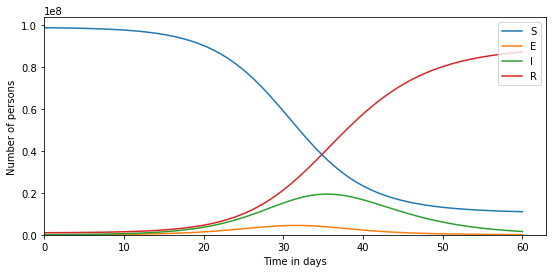

In [3]:
def seir_model():

    s = numpy.zeros(num_steps + 1)
    e = numpy.zeros(num_steps + 1)
    i = numpy.zeros(num_steps + 1)
    r = numpy.zeros(num_steps + 1)

    s[0] = 1e8 - 1e6 - 1e5
    e[0] = 0.
    i[0] = 1e5
    r[0] = 1e6

    for step in range(num_steps):
        s[step+1] = s[step] - h*transmission_coeff*i[step]*s[step]
        e[step+1] = e[step] + h*(transmission_coeff*i[step]*s[step] - (1/latency_time)*e[step])
        i[step+1] = i[step] + h*(latency_time*e[step] - (1/infectious_time)*i[step])
        r[step+1] = r[step] + h*((1/infectious_time)*i[step])
        
    return s, e, i, r

s, e, i, r = seir_model()

@show_plot
def plot_me():
    s_plot = matplotlib.pyplot.plot(times, s, label = 'S')
    e_plot = matplotlib.pyplot.plot(times, e, label = 'E')
    i_plot = matplotlib.pyplot.plot(times, i, label = 'I')
    r_plot = matplotlib.pyplot.plot(times, r, label = 'R')
    matplotlib.pyplot.legend(('S', 'E', 'I', 'R'), loc = 'upper right')
    
    axes = matplotlib.pyplot.gca()
    axes.set_xlabel('Time in days')
    axes.set_ylabel('Number of persons')
    matplotlib.pyplot.xlim(left = 0.)
    matplotlib.pyplot.ylim(bottom = 0.)
    
plot_me()




## Alternative

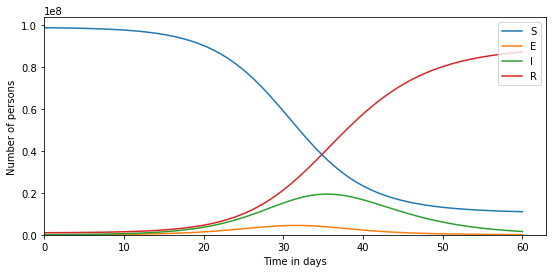

In [4]:
def seir_model():

    s = numpy.zeros(num_steps + 1)
    e = numpy.zeros(num_steps + 1)
    i = numpy.zeros(num_steps + 1)
    r = numpy.zeros(num_steps + 1)

    s[0] = 1e8 - 1e6 - 1e5
    e[0] = 0.
    i[0] = 1e5
    r[0] = 1e6

    for step in range(num_steps):
        s2e = h * transmission_coeff * s[step] * i[step]
        e2i = h / latency_time * e[step]
        i2r = h / infectious_time * i[step]
        s[step+1] = s[step] - s2e
        e[step+1] = e[step] + s2e - e2i
        i[step+1] = i[step] + e2i - i2r
        r[step+1] = r[step] + i2r
        
    return s, e, i, r

s, e, i, r = seir_model()

@show_plot
def plot_me():
    s_plot = matplotlib.pyplot.plot(times, s, label = 'S')
    e_plot = matplotlib.pyplot.plot(times, e, label = 'E')
    i_plot = matplotlib.pyplot.plot(times, i, label = 'I')
    r_plot = matplotlib.pyplot.plot(times, r, label = 'R')
    matplotlib.pyplot.legend(('S', 'E', 'I', 'R'), loc = 'upper right')
    
    axes = matplotlib.pyplot.gca()
    axes.set_xlabel('Time in days')
    axes.set_ylabel('Number of persons')
    matplotlib.pyplot.xlim(left = 0.)
    matplotlib.pyplot.ylim(bottom = 0.)
    
plot_me()

### Step size and instability

/usr/local/miniconda3/envs/data/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in double_scalars
/usr/local/miniconda3/envs/data/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


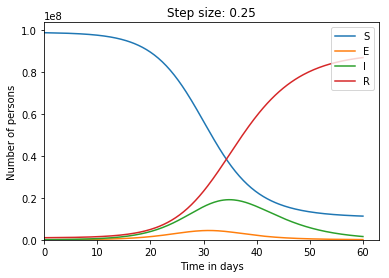

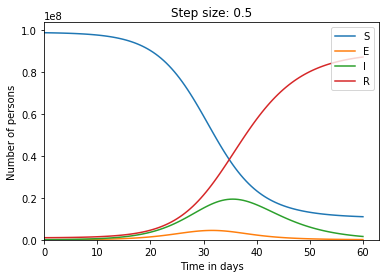

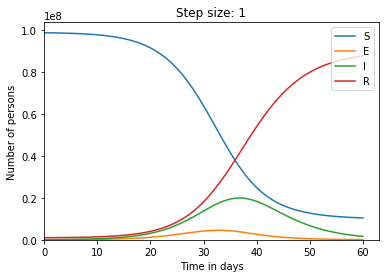

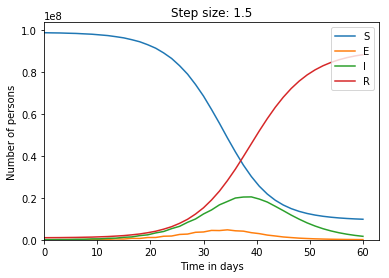

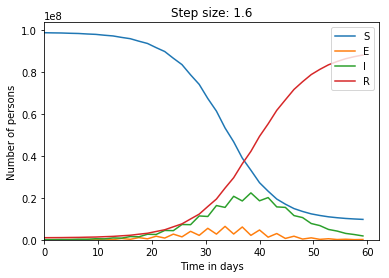

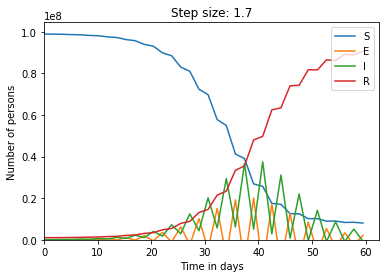

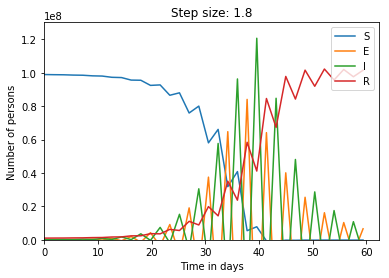

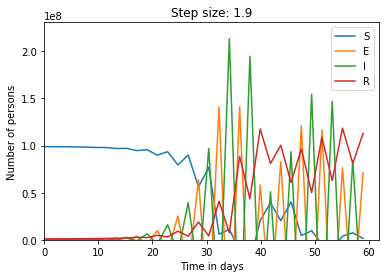

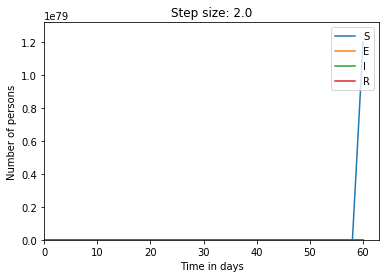

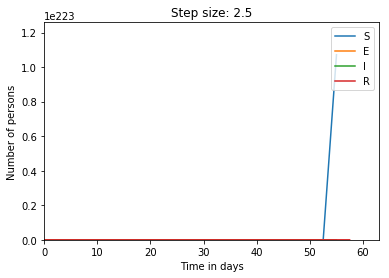

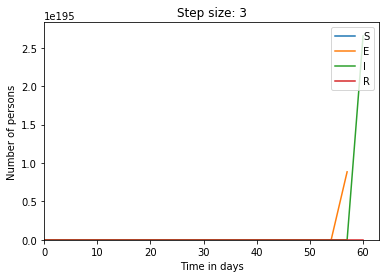

In [15]:
end_time = 60.0 # days

for s_size in [0.25, 0.5, 1, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.5, 3]:
    h = s_size # days
    transmission_coeff = 5e-9 # 1 / day person
    latency_time = 1. # days
    infectious_time = 5. # days

    end_time = 60.0 # days
    num_steps = int(end_time / h)
    times = h * numpy.array(range(num_steps + 1))
    
    s = numpy.zeros(num_steps + 1)
    e = numpy.zeros(num_steps + 1)
    i = numpy.zeros(num_steps + 1)
    r = numpy.zeros(num_steps + 1)

    s[0] = 1e8 - 1e6 - 1e5
    e[0] = 0.
    i[0] = 1e5
    r[0] = 1e6

    for step in range(num_steps):
        s2e = h * transmission_coeff * s[step] * i[step]
        e2i = h / latency_time * e[step]
        i2r = h / infectious_time * i[step]
        s[step+1] = s[step] - s2e
        e[step+1] = e[step] + s2e - e2i
        i[step+1] = i[step] + e2i - i2r
        r[step+1] = r[step] + i2r
        
        
    plt.figure()
    s_plot = plt.plot(times, s, label = 'S')
    e_plot = plt.plot(times, e, label = 'E')
    i_plot = plt.plot(times, i, label = 'I')
    r_plot = plt.plot(times, r, label = 'R')
    matplotlib.pyplot.legend(('S', 'E', 'I', 'R'), loc = 'upper right')

    axes = plt.gca()
    axes.set_xlabel('Time in days')
    axes.set_ylabel('Number of persons')
    plt.xlim(left = 0.)
    plt.ylim(bottom = 0.)
    plt.title(f"Step size: {h}")
    plt.plot()

    